In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv("train.csv")
features=pd.read_csv("features.csv")
stores=pd.read_csv("stores.csv")
print(train.head())
print(features.head())
print(stores.head())

df=pd.merge(train,features,on=['Store','Date','IsHoliday'])
df=pd.merge(df,stores,on='Store')


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211

In [5]:
print(df.isnull().sum())
print('*'*50)
print(df.info())
print('*'*50)
print(df.describe())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2   

In [7]:
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]=df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [9]:

df['size_bin'] = pd.qcut(df['Size'], 4, labels=['Small', 'Medium', 'Large', 'XL'])


size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3, 'XL': 4}
df['size'] = df['size_bin'].map(size_mapping)

df = df.drop(['Size', 'size_bin'], axis=1)

print(df.head())

        Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
277665     29     5 2010-02-05      15552.08      False        24.36   
277808     29     6 2010-02-05       3200.22      False        24.36   
277951     29     7 2010-02-05      10820.05      False        24.36   
278094     29     8 2010-02-05      20055.64      False        24.36   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        0.0        0.0        0.0        0.0        0.0   
277665       2.788        0.0        0.0        0.0        0.0        0.0   
277808       2.788        0.0        0.0        0.0        0.0        0.0   
277951       2.788        0.0        0.0        0.0        0.0        0.0   
278094       2.788        0.0        0.0        0.0        0.0        0.0   

               CPI  Unemployment Type size  
0       211.096358         8.106    A    3  
277665  131.52

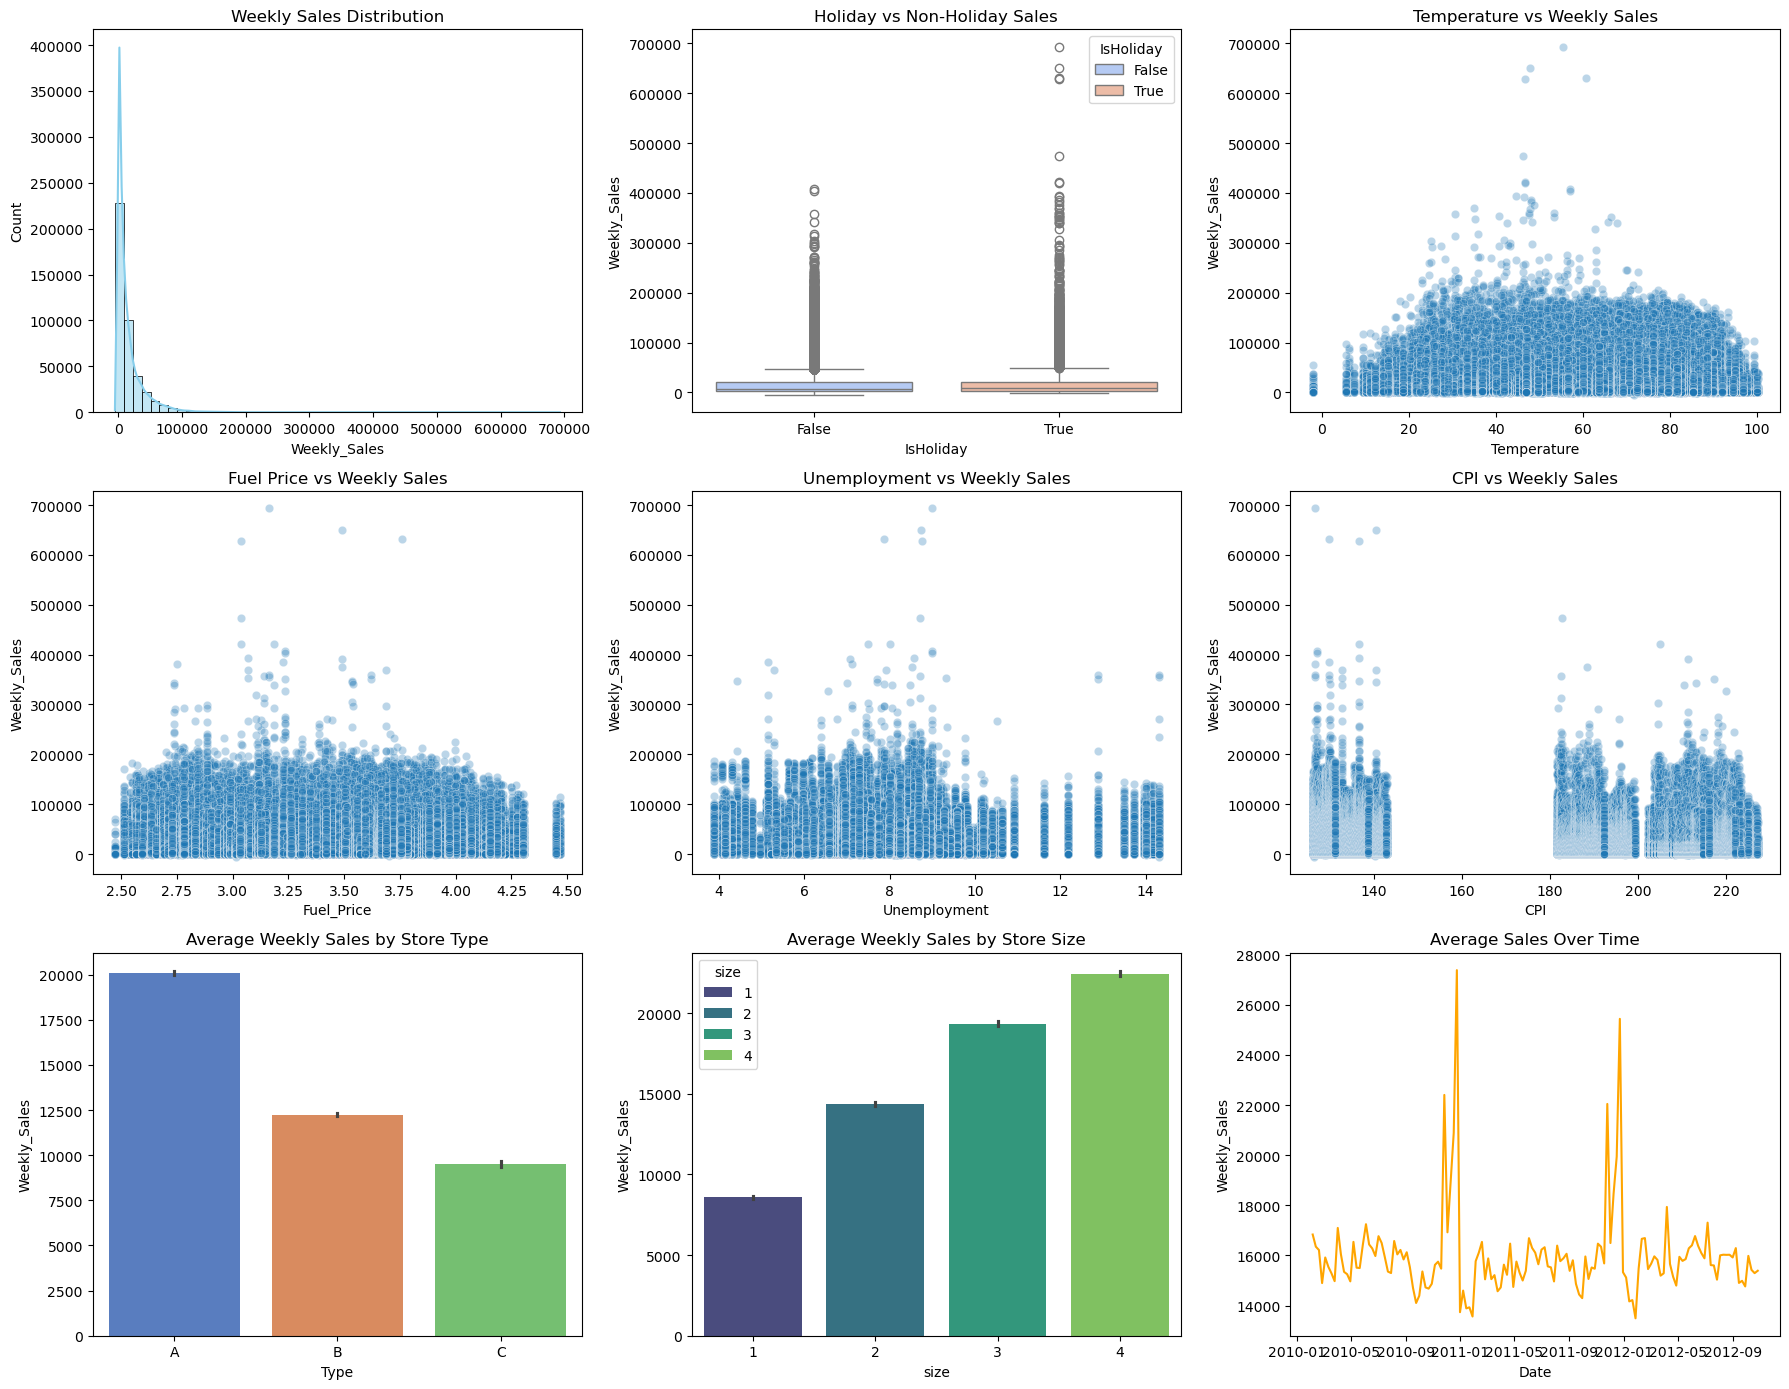

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Dashboard with multiple plots
fig, axes = plt.subplots(3,3, figsize=(18,14))

# 1. Weekly Sales Distribution
sns.histplot(df['Weekly_Sales'], bins=50, kde=True, color="skyblue", ax=axes[0,0])
axes[0,0].set_title("Weekly Sales Distribution")

# 2. Holiday vs Non-Holiday
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df, palette="coolwarm",hue='IsHoliday', ax=axes[0,1])
axes[0,1].set_title("Holiday vs Non-Holiday Sales")

# 3. Temperature vs Sales
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.3, ax=axes[0,2])
axes[0,2].set_title("Temperature vs Weekly Sales")

# 4. Fuel Price vs Sales
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.3, ax=axes[1,0])
axes[1,0].set_title("Fuel Price vs Weekly Sales")

# 5. Unemployment vs Sales
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, alpha=0.3, ax=axes[1,1])
axes[1,1].set_title("Unemployment vs Weekly Sales")

# 6. CPI vs Sales
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, alpha=0.3, ax=axes[1,2])
axes[1,2].set_title("CPI vs Weekly Sales")

# 7. Store Type
sns.barplot(x='Type', y='Weekly_Sales', data=df, estimator=np.mean, palette="muted",hue='Type', ax=axes[2,0])
axes[2,0].set_title("Average Weekly Sales by Store Type")

# 8. Store Size (Binned)
sns.barplot(x='size', y='Weekly_Sales', data=df, estimator=np.mean, palette="viridis",hue='size', ax=axes[2,1])
axes[2,1].set_title("Average Weekly Sales by Store Size")

# 9. Sales Trend over Time
df['Date'] = pd.to_datetime(df['Date'])
weekly_trend = df.groupby('Date')['Weekly_Sales'].mean().reset_index()
sns.lineplot(x='Date', y='Weekly_Sales', data=weekly_trend, ax=axes[2,2], color="orange")
axes[2,2].set_title("Average Sales Over Time")

plt.tight_layout()
plt.show()


In [12]:
df['Type'] = df['Type'].astype('category').cat.codes
df['size'] = df['size'].astype('category').cat.codes
df['IsHoliday'] = df['IsHoliday'].astype(int)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week



In [15]:
print(df.head())

        Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50          0        42.31   
277665     29     5 2010-02-05      15552.08          0        24.36   
277808     29     6 2010-02-05       3200.22          0        24.36   
277951     29     7 2010-02-05      10820.05          0        24.36   
278094     29     8 2010-02-05      20055.64          0        24.36   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        0.0        0.0        0.0        0.0        0.0   
277665       2.788        0.0        0.0        0.0        0.0        0.0   
277808       2.788        0.0        0.0        0.0        0.0        0.0   
277951       2.788        0.0        0.0        0.0        0.0        0.0   
278094       2.788        0.0        0.0        0.0        0.0        0.0   

               CPI  Unemployment  Type  size  Year  Month  Week  
0       211.096358         8.106     0

In [17]:
df = df.drop(['Date',], axis=1)

In [19]:
df = df.drop(['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], axis=1) 

In [21]:
print(df.head())

        Store  Dept  Weekly_Sales  IsHoliday  Type  size  Year  Month  Week
0           1     1      24924.50          0     0     2  2010      2     5
277665     29     5      15552.08          0     1     0  2010      2     5
277808     29     6       3200.22          0     1     0  2010      2     5
277951     29     7      10820.05          0     1     0  2010      2     5
278094     29     8      20055.64          0     1     0  2010      2     5


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:

from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(x_test)

# Evaluate
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R² score: {r2:.4f}")




XGBoost RMSE: 71.60
XGBoost R² score: 0.9495


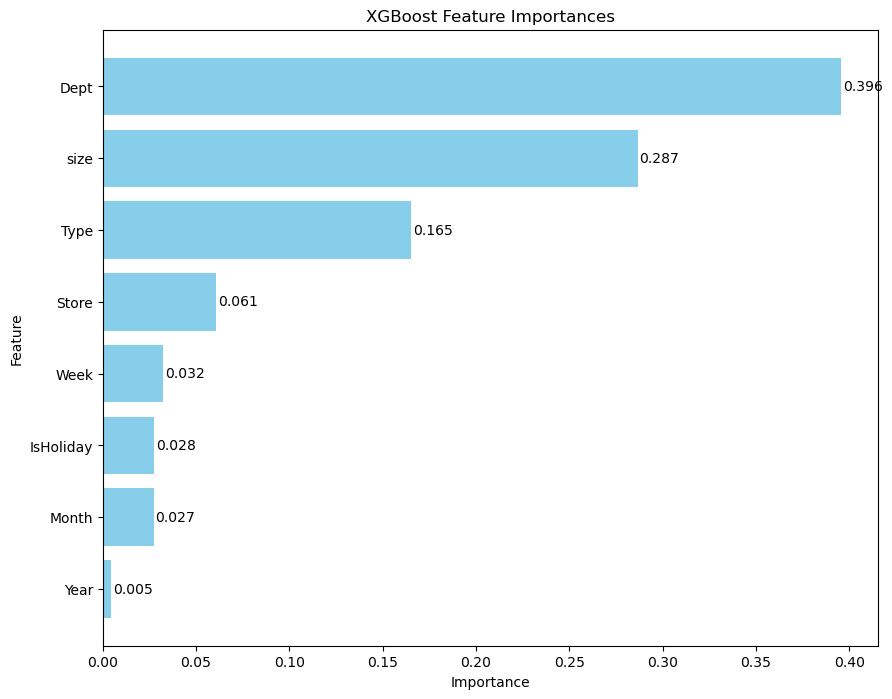

In [30]:
from xgboost import plot_importance


importance = xgb_model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Add numeric labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')

plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [32]:
test_data=pd.read_csv("test.csv")

In [36]:
for col in X.columns:
    if col not in test_data.columns:
        # Fill missing numerical columns with 0 or mean from training set
        if X[col].dtype in ['int64', 'float64']:
            test_data[col] = X[col].mean()  # or 0 if you prefer
        else:
            # Fill missing categorical columns with the most frequent category
            test_data[col] = X[col].mode()[0]
Final_test = test_data[X.columns]
# Predict using the trained XGBoost model
test_data['Predicted_Weekly_Sales'] = xgb_model.predict(Final_test)

# Show results
test_data[['Store', 'Dept', 'Date', 'Predicted_Weekly_Sales']].head()


,Store,Dept,Date,Predicted_Weekly_Sales
0,1,1,2012-11-02,11362.725586
1,1,1,2012-11-09,11362.725586
2,1,1,2012-11-16,11362.725586
3,1,1,2012-11-23,12525.708008
4,1,1,2012-11-30,11362.725586


In [38]:
import os
os.getcwd()


'/Users/keshavreddy/WALMART SALES ANALYSIS'